In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = os.path.join("Downloads","Mouse_metadata.csv")
study_results_path = os.path.join("Downloads","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
out = mouse_metadata.append(study_results)

# Display the data table for preview
print(out)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male        21.0        16.0        NaN   
1        s185    Capomulin  Female         3.0        17.0        NaN   
2        x401    Capomulin  Female        16.0        15.0        NaN   
3        m601    Capomulin    Male        22.0        17.0        NaN   
4        g791     Ramicane    Male        11.0        16.0        NaN   
...       ...          ...     ...         ...         ...        ...   
1888     r944          NaN     NaN         NaN         NaN       45.0   
1889     u364          NaN     NaN         NaN         NaN       45.0   
1890     p438          NaN     NaN         NaN         NaN       45.0   
1891     x773          NaN     NaN         NaN         NaN       45.0   
1892     b879          NaN     NaN         NaN         NaN       45.0   

      Tumor Volume (mm3)  Metastatic Sites  
0                    NaN               NaN  
1                    NaN         

In [41]:
# Checking the number of mice.
total_mice = out['Mouse ID'].nunique()
print(total_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
out.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,NaN,NaN,NaN
1,s185,Capomulin,Female,3.0,17.0,NaN,NaN,NaN
2,x401,Capomulin,Female,16.0,15.0,NaN,NaN,NaN
3,m601,Capomulin,Male,22.0,17.0,NaN,NaN,NaN
4,g791,Ramicane,Male,11.0,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1888,r944,NaN,NaN,NaN,NaN,45.0,41.581521,2.0
1889,u364,NaN,NaN,NaN,NaN,45.0,31.023923,3.0
1890,p438,NaN,NaN,NaN,NaN,45.0,61.433892,1.0
1891,x773,NaN,NaN,NaN,NaN,45.0,58.634971,4.0


In [49]:
# Checking the number of mice in the clean DataFrame.
clean_mice = out['Mouse ID'].nunique()
clean_mice

NameError: name 'new' is not defined

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = out['Tumor Volume (mm3)'].mean()
median = out['Tumor Volume (mm3)'].median()
variance = out['Tumor Volume (mm3)'].var()
std = out['Tumor Volume (mm3)'].std()
sem = out['Tumor Volume (mm3)'].sem()



summary_df = pd.DataFrame({"mean  " : [mean],
                            "median ": [median],
                            "variance  " : [variance],
                          "standard deviation " : [std],
                          "SEM " : [sem]})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

a = out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "mean"})
b = out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "median"})
c = out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "var"})
d = out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "std"})
e = out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "sem"})

summary = pd.DataFrame({"mean  " : [a],
                            "median ": [b],
                            "variance  " : [c],
                          "standard deviation " : [d],
                          "SEM " : [e]})
summary

,mean,median,variance,standard deviation,SEM
0,Drug Regimen Tumor Volume (mm3) 0 Capomu...,Drug Regimen Tumor Volume (mm3) 0 Capomu...,Drug Regimen Tumor Volume (mm3) 0 Capomu...,Drug Regimen Tumor Volume (mm3) 0 Capomu...,Drug Regimen Tumor Volume (mm3) 0 Capomu...


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "mean"},
                                                {"Tumor Volume (mm3)" : "median"},
                                                {"Tumor Volume (mm3)" : "var"},
                                                {"Tumor Volume (mm3)" : "std"},
                                                {"Tumor Volume (mm3)" : "sem"})

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,NaN
1,Ceftamin,NaN
2,Infubinol,NaN
3,Ketapril,NaN
4,Naftisol,NaN
5,Placebo,NaN
6,Propriva,NaN
7,Ramicane,NaN
8,Stelasyn,NaN
9,Zoniferol,NaN


AttributeError: module 'pandas' has no attribute 'show'

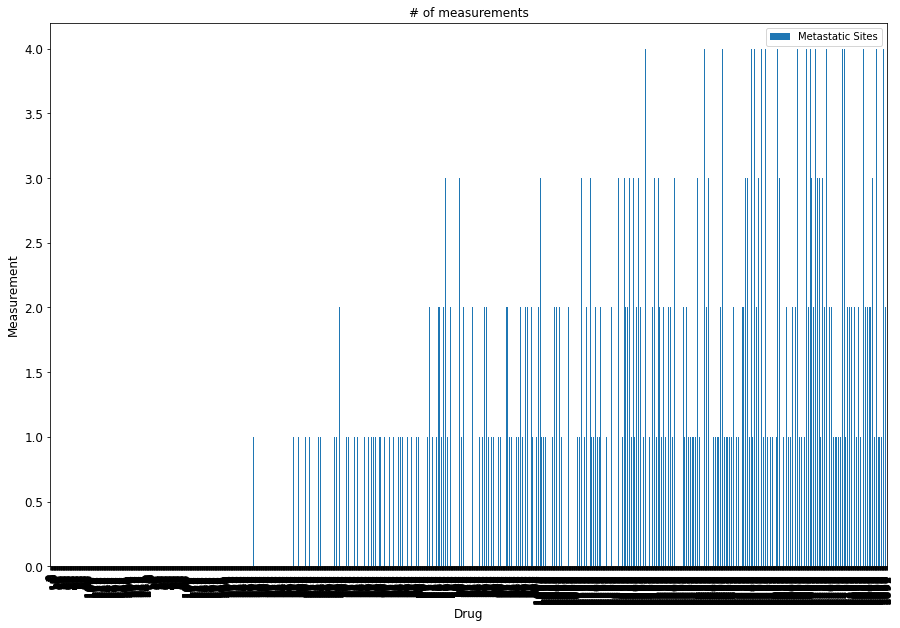

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ax = out[['Drug Regimen','Metastatic Sites']].plot(kind='bar', title ="# of measurements", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Drug", fontsize=12)
ax.set_ylabel("Measurement", fontsize=12)
plt.show(ax)

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
ax = out[['Drug Regimen','Metastatic Sites']].plot(kind='bar', title ="# of measurements", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Drug", fontsize=12)
ax.set_ylabel("Measurement", fontsize=12)
plt.show(ax)

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

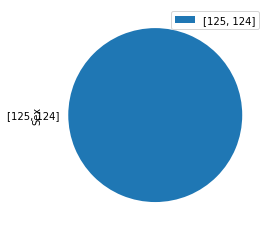

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = out['Sex'].value_counts()
malem = pd.DataFrame({'Sex': [mice]})

malem.apply(pd.value_counts).plot.pie(subplots=True)


In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
out.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": "count"})
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0
1,Ceftamin,0
2,Infubinol,0
3,Ketapril,0
4,Naftisol,0
5,Placebo,0
6,Propriva,0
7,Ramicane,0
8,Stelasyn,0
9,Zoniferol,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

# Assemble the resulting series into a single summary dataframe.

    # add subset 
    
    # Determine outliers using upper and lower bounds

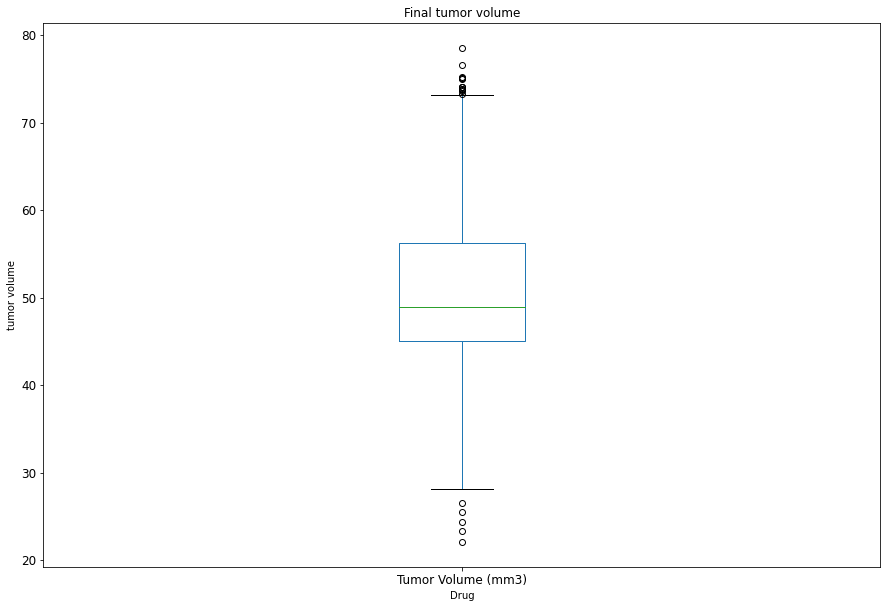

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
out['Tumor Volume (mm3)'].iloc[-1]
ab = out[['Drug Regimen','Tumor Volume (mm3)']].plot(kind='box', title ='Final tumor volume', figsize=(15, 10), legend=True, fontsize=12)
ab.set_xlabel("Drug")
ab.set_ylabel("tumor volume")
plt.show(ab)

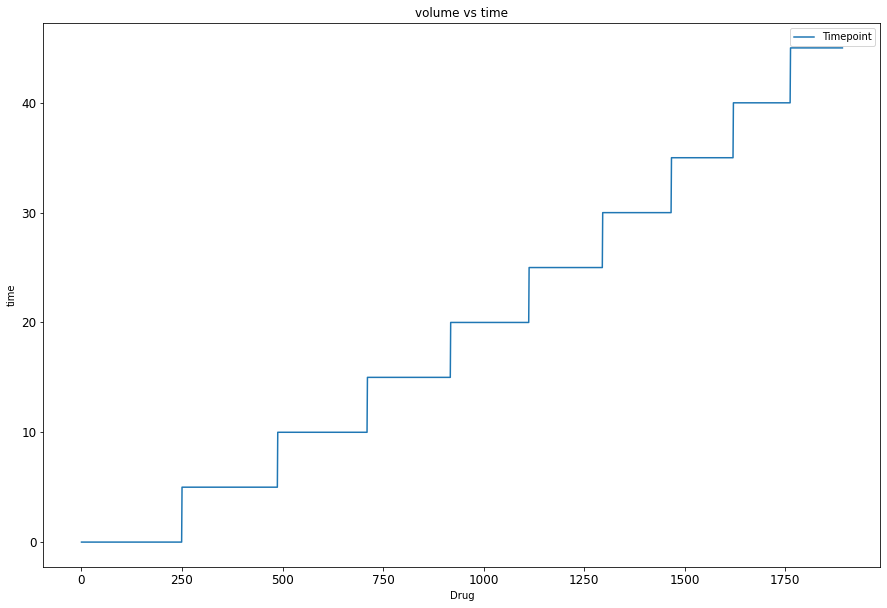

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ap = out[['Drug Regimen','Timepoint']].plot(kind='line', title ='volume vs time', figsize=(15, 10), legend=True, fontsize=12)
ap.set_xlabel("Drug")
ap.set_ylabel("time")
plt.show(ap)

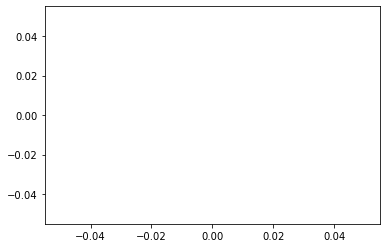

In [123]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(out.iloc[:,6],out.iloc[:,4])
plt.show()



In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen